In [1]:
import tensorflow

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

import numpy as np

In [2]:
datagen = ImageDataGenerator(rescale=1/225.0)

In [3]:
img_width=256
img_height=256

In [4]:
train_ds = image_dataset_from_directory(directory="/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train",image_size=(256, 256))
valid_ds = image_dataset_from_directory(directory="/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid",image_size=(256, 256))

class_names = train_ds.class_names


rescale = Rescaling(scale=1.0/255)
train_ds = train_ds.map(lambda image,label:(rescale(image),label))
valid_ds  = valid_ds.map(lambda image,label:(rescale(image),label))

Found 70295 files belonging to 38 classes.
Found 17572 files belonging to 38 classes.


In [6]:
model = keras.Sequential()

In [7]:
model.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same",input_shape=(256,256,3)))
model.add(keras.layers.Conv2D(32,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(256,(3,3),activation="relu",padding="same"))

model.add(keras.layers.Conv2D(512,(5,5),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(512,(5,5),activation="relu",padding="same"))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(1568,activation="relu"))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(38,activation="softmax"))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 85, 85, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 85, 85, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 85, 85, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 28, 64)       0         
 2D)                                                    

In [9]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [10]:
history = model.fit(train_ds, validation_data = valid_ds,epochs = 10)

Epoch 1/10
2197/2197 [==============================] - 721s 325ms/step - loss: 1.4654 - accuracy: 0.5691 - val_loss: 0.5216 - val_accuracy: 0.8309
Epoch 2/10
2197/2197 [==============================] - 710s 323ms/step - loss: 0.4265 - accuracy: 0.8628 - val_loss: 0.2858 - val_accuracy: 0.9037
Epoch 3/10
2197/2197 [==============================] - 710s 323ms/step - loss: 0.2503 - accuracy: 0.9179 - val_loss: 0.2050 - val_accuracy: 0.9307
Epoch 4/10
2197/2197 [==============================] - 709s 323ms/step - loss: 0.1745 - accuracy: 0.9423 - val_loss: 0.1558 - val_accuracy: 0.9484
Epoch 5/10
2197/2197 [==============================] - 710s 323ms/step - loss: 0.1301 - accuracy: 0.9564 - val_loss: 0.1585 - val_accuracy: 0.9494
Epoch 6/10
2197/2197 [==============================] - 709s 323ms/step - loss: 0.0991 - accuracy: 0.9669 - val_loss: 0.1446 - val_accuracy: 0.9562
Epoch 7/10
2197/2197 [==============================] - 710s 323ms/step - loss: 0.0830 - accuracy: 0.9729 - val_

In [11]:
model.save('model.h5')

In [12]:
result = model.evaluate(valid_ds)

550/550 [==============================] - 56s 101ms/step - loss: 0.1857 - accuracy: 0.9531


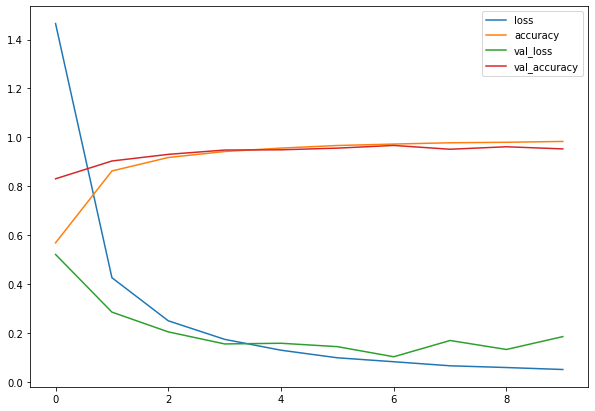

In [13]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(10, 7));

In [89]:
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [14]:
class_names = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [16]:
from tensorflow.keras.models import load_model
model = load_model('model.h5')

In [17]:
from tensorflow.keras.preprocessing import image


path = '/content/dee4cbf1-9bdd-451a-b1bb-21756fd981e9___FREC_C.Rust 3727_180deg.JPG'

img = image.load_img(path, target_size=(256,256))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
pred = model.predict(x)

# print("prediction", pred)


d = pred.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = class_names[index]

confidence = round(100 * j, 3)

print(class_name, confidence )  

Apple___Cedar_apple_rust 100.0
